In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.io import output_notebook
from bokeh.models.tools import HoverTool

In [3]:
output_notebook()
p = figure(plot_width = 600, plot_height = 600)

Loading BokehJS ...

In [4]:
bokeh_data = pd.read_csv('https://raw.githubusercontent.com/kalilurrahman/datasets/main/Titanic.csv')
bokeh_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exersice #1

## a) Create a bokeh plot showcasing the scatter on 'age' and 'fare.'

In [5]:
p.scatter(bokeh_data['Age'],bokeh_data['Fare'], alpha = 0.5, color = 'red')
show(p)

## b) Use the ''square" plotting function to check the outcome.

In [6]:
p.square(bokeh_data['Age'],bokeh_data['Fare'], color = 'green')
show(p)

## c) Play around with other bokeh marker types to see various outputs.

In [7]:
p.circle(bokeh_data['Age'],bokeh_data['Fare'], alpha = 0.9, size = 15, color = 'lightblue')
show(p)

## Exercise #2

## a) Create a scatter plot on age and fare with a legend field on Pclass.

In [8]:
from bokeh.palettes import Accent3
color = []
c1 = Accent3[2] # red
c2 = Accent3[0] # blue
c3 = Accent3[1]
for i in bokeh_data['Pclass']:
    if i == 1:
        color.append(c1)
    elif i == 2:
        color.append(c2)
    elif i == 3:
        color.append(c3)
bokeh_data['color'] = color
bokeh_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,color
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,#beaed4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,#fdc086
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,#beaed4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,#fdc086
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,#beaed4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,#7fc97f
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,#fdc086
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,#beaed4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,#fdc086


In [9]:
p = figure(height=300)
p.circle( x='Age', y='Fare', radius=0.5, legend_field='Pclass', source=bokeh_data, color = 'color')

show(p)

## b) Use a marker array for various classes and map the travel class as 1,2,3.

## c) Use a factor colormap of Viridis256 on the travel class

In [10]:
from bokeh.palettes import Viridis256


## Exercise-3:
## a) Create a ColumnDataSource on the Titanic dataset

In [11]:
from bokeh.models import ColumnDataSource
tit_data = ColumnDataSource(bokeh_data)
tit_data

ColumnDataSource(id='1414', ...)

## b) Create a CDSView (Column Data Source View) with an IndexFilter at 10,50,90 and 130

In [12]:
from bokeh.models import CDSView, IndexFilter
titanic_view = CDSView(source=tit_data, filters=[IndexFilter([10,50,90,130])])
titanic_view

CDSView(id='1420', ...)

## c)Define tools to be displayed box_select, hover, and reset

In [13]:
tools = ["box_select", "hover", "reset"]
tools

['box_select', 'hover', 'reset']

## d) Create a plot with a height and width of 300 pixels and pass tools setting

In [14]:
pl = figure(plot_height = 300, plot_width = 300, tools = tools)

## e)Create a circle scatter plot with the x-axis of age and y-axis of fare and hover color of "purple."

In [15]:
pl.scatter(x='Age',y='Fare', hover_color = 'purple', source = tit_data, radius=0.5)
show(pl)

## f)Create a filtered plot with the same setting

In [16]:
pl_filtered = figure(plot_height = 300, plot_width = 300, tools = tools)

## g) Create a filtered scatter plot with the filter created above

In [17]:
pl_filtered.scatter(x='Age',y='Fare', radius =0.5, source = tit_data, view = titanic_view)
show(pl_filtered)

## h) Show a grid plot with both the scatter plots - regular and filtered

In [18]:
from bokeh.layouts import gridplot
show(gridplot([[pl,pl_filtered]]))

## Exercise-4:
## a. Create a plot with three grids to showcase:

## i. The first plot will be a circle scatter plot of the age and fare columns of the dataset. You can choose the color and transparency (alpha) of your choice

In [19]:
pl_c = figure(plot_height = 350, plot_width = 350, tools = tools)
pl_c.scatter(x='Age', y = 'Fare', radius = 0.5, source = bokeh_data,color = 'red', alpha = 15)
show(pl_c)

## ii. The second plot will be a triangle scatter plot of the fare and age columns of the dataset. You can choose the color and transparency (alpha) of your choice

In [20]:
pl_t = figure(plot_height = 350, plot_width = 350, tools = tools)
pl_t.triangle(x='Age', y='Fare', size = 5, source = bokeh_data,color ='green')
show(pl_t)

## iii. The third plot will be a square scatter plot of class and age columns of the dataset. You can choose the color and transparency (alpha) of your choice

In [21]:
pl_s = figure(plot_height = 350, plot_width = 350, tools = tools)
pl_s.square(x = 'Age', y='Fare', size = 5, source=bokeh_data, color = 'blue')
show(pl_s)

In [22]:
show(gridplot([[pl_c,pl_t,pl_s]]))

## b. Create a gridplot with a 2x2 matrix with two plots in the first row, an empty first column in the second row, and the third plot in the final column

In [23]:
pl_empty = figure(plot_height = 350, plot_width =350, tools = tools)
show(gridplot([[pl_empty,pl_c],[pl_t,pl_s]]))

## c. Play around with the choices; what do you see?

### Answer: place of plot changed by choice

## Exercise-5:
## a. Group all the data under travel class Pclass

In [24]:
group = bokeh_data.groupby('Pclass').count()
group

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,color
Pclass,,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214,216
2,184,184,184,184,173,184,184,184,184,16,184,184
3,491,491,491,491,355,491,491,491,491,12,491,491


## b. Plot a vertical bar chart based on Passenger Travel Class - Pclass that we grouped by

In [25]:
bar_plot = figure(plot_height = 400, plot_width = 400)
bar_plot.vbar(x = 'Pclass', top = 'Age', width = 0.7, source=group)

show(bar_plot)

## Exercise-6:

## a. Build an array based on the place of embarkation for the passengers

In [28]:
embarkat_passengers = np.array({'Embar': embar['PassengerId'], 'Embarked': ['C','Q','S']})
embarkat_passengers

array({'Embar': Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64, 'Embarked': ['C', 'Q', 'S']},
      dtype=object)

## b. Count the total number of passengers embarking on different stations

In [27]:
embar = bokeh_data.groupby('Embarked').count()
embar

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,color
Embarked,,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69,168
Q,77,77,77,77,77,28,77,77,77,77,4,77
S,644,644,644,644,644,554,644,644,644,644,129,644


## c. Use a ColumnDataSource with color options for each of the category

In [31]:
from bokeh.palettes import Paired3
color_1 = Paired3[0]
color_2 = Paired3[1]
color_3 = Paired3[2]
colors = {color_1, color_2, color_3}
embar['Color'] = colors
embar

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,color,Color
Embarked,,,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69,168,#a6cee3
Q,77,77,77,77,77,28,77,77,77,77,4,77,#b2df8a
S,644,644,644,644,644,554,644,644,644,644,129,644,#1f78b4


In [32]:
e_source = ColumnDataSource(embar)

## d. Plot a vertical bar chart based on embarkation location

In [48]:
e_plot = figure(plot_height = 400, plot_width = 400,toolbar_location=None, tools="")
e_plot.vbar(x = 'Embarked', top = 'Age',width = 0.9, source=embar)

show(e_plot)

## Exercise-7: 
## a. Import the bokeh. transform function for jitter

In [33]:
from bokeh.transform import jitter

## b. Build a Dataframe of the class of travel Pclass and fare

In [34]:
jitter_data = pd.DataFrame(bokeh_data[['Pclass','Fare']])
jitter_data

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500
...,...,...
886,2,13.0000
887,1,30.0000
888,3,23.4500
889,1,30.0000


## c. Plot a scatter chart with fare and jitter on Pclass

In [35]:
j_plot = figure(height = 300, width = 300)
j_plot.scatter(x='Pclass', y='Fare', size = 10, source = jitter_data)
show(j_plot)

In [36]:
j_plot.scatter(x = jitter('Pclass',0.4), y='Fare', size =10, source = jitter_data)
show(j_plot)

## d. What do you see?

### Answer: x_axis has range for values

## Exercise-8:
## a. Create a correlation of all values in the Titanic dataset

In [37]:
clean_titanic_data = bokeh_data.drop(['Name','Ticket','Cabin','Embarked','Sex','color'],axis = 1)
clean_titanic_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [38]:
corr = clean_titanic_data.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## b. Set the index of the columns and set the index in the tight format for  the correlation dataframe

<AxesSubplot:>

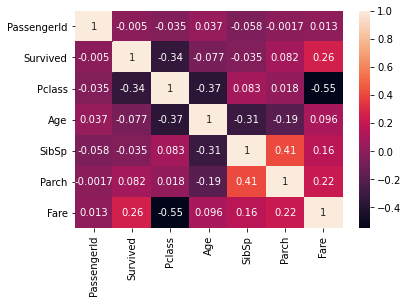

In [39]:
sns.heatmap(corr,annot = True)

## c. Assign the correlated values to a linear color mapper through the LinearColorMapper function

In [40]:
from bokeh.models import LinearColorMapper
c_plot = figure(height = 400, width = 400)
exp_cmap = LinearColorMapper(palette='Viridis256', 
                             low = min(corr["PassengerId"]), 
                             high = max(corr["PassengerId"]))

## d. Define a set of tools such as box_select, lasso_select, pan, wheel_zoom, box_zoom, reset, hover, and help

In [41]:
Tools = ['box_select','lasso_select','pan','wheel_zoom','box_zoom','reser','hover','help']

## e. Create a figure with x_range and y_range values defined by the list of the unique column, and row values defined earlier

In [42]:
c_plot.xaxis.axis_label = "Age"
c_plot.yaxis.axis_label = "Fare"

## f. Create a heatmap using the rect function. Use the ColumnDataSource of the correlation dataframe and pass the indexed columns for X and Y values

In [43]:
source_corr = ColumnDataSource(corr)

c_plot.rect('Age', 'Fare', width=1, height=1, line_color="white", source = source_corr)

GlyphRenderer(id='4085', ...)

## g. Define a color bar and assign it to the tickers

In [44]:
from bokeh.models import ColorBar
mapper = LinearColorMapper( palette=Viridis256, low=0, high=1)
colors= { 'field': corr['Pclass'], 'transform': mapper}
color_bar = ColorBar( color_mapper=mapper, location=( 0, 0))


## h. Show the plot

In [45]:
show(c_plot)